# Convolution Neural Network (full one)

## CNN (how we will build it)

Image

🠋

Convolution

🠋

ReLU

🠋

Pooling

🠋

Convolution

🠋

ReLU

🠋

Pooling

🠋

Flatten

🠋

Dense

🠋

Outcome


Now that we understand it, let's get down to code.

## Code

### Imports


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

### Data.

In [ ]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(
    root="../data/data-conv",
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root="../data/data-conv",
    train=False,
    download=True,
    transform=transform
)

ToTensor()


### Batching (technically also data.)

In [7]:
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

Okay now let's take a look at our data.

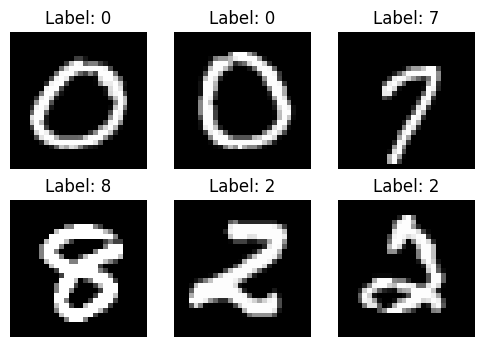

In [ ]:
images, labels = next(iter(train_loader))

plt.figure(figsize=(6,4))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")

plt.show()

## Now CNN.
##### As in: the most important part.

In this model we go: Convolution => Pooling => Dense => Convolution => ReLU => Pooling => Flatten => Dense

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self): # constructor
        super().__init__()

        self.conv = nn.Conv2d(
            in_channels=1,
            out_channels=8,
            kernel_size=3
        )

        self.pool = nn.MaxPool2d(2,2)

        self.fc = nn.Linear(8 * 13 * 13, 10) # 10 neurons, each for number 0-9

    def forward(self, x):
        x = self.conv(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1) # flatten: instead of [batch, 8, 13, 13] we get "flatter" version: [batch, 1352]    (8*13*13=1352)
        x = self.fc(x) # fc - Fully Connected - dense

        return x

We created a class with methods that make each step of our Convolutional Neural Network work. Now we can test it.

In [18]:
model = SimpleCNN()
x = torch.randn(1, 1, 28, 28)
y = model(x)

print(y.shape)

torch.Size([1, 10])


## Training

### Prep

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training loop

In [20]:
num_epochs = 3

for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad() # empty gradients
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/3, Loss: 0.0972
Epoch 2/3, Loss: 0.0451
Epoch 3/3, Loss: 0.0861


In [23]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 97.19%
